<h3>Imports</h3>

In [141]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

Loading the dataset

In [119]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [120]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [121]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<h3>Handling misssing data</h3>

In [122]:
#Checking for null
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h2>Exploratory Data Analysis</h2>

<h4>HeatMap Correlation</h4>

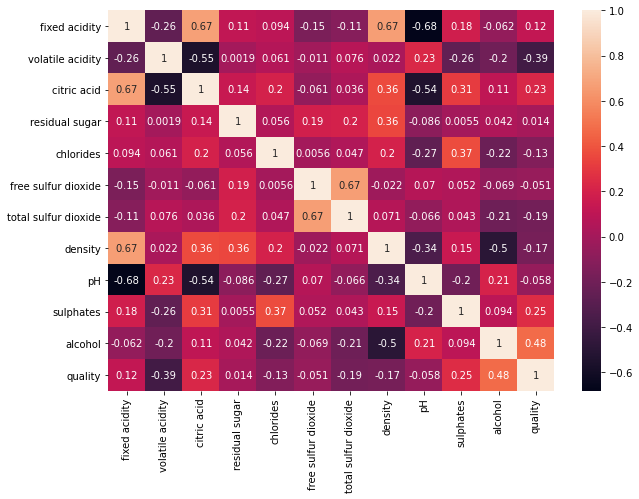

In [123]:
fig , ax = plt.subplots(figsize = (10,7))
sns.heatmap(df.corr() , annot = True , ax = ax)
plt.show()

We have a high co-relation between fixed acidity and density of 0.67

<h2>Data preprocessing</h2>

<h3>Features Importance</h3>

<h4>Using random forrest to analyse the feature importance</h4>

In [124]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=12)
x = df.drop(['quality'] , axis = 1)
wd = pd.get_dummies(df)
model.fit(x, df.quality)
display(model.feature_importances_)

array([0.05049791, 0.13604892, 0.04475298, 0.05247952, 0.05881777,
       0.0458654 , 0.07643178, 0.0515247 , 0.05821171, 0.14268737,
       0.28268191])

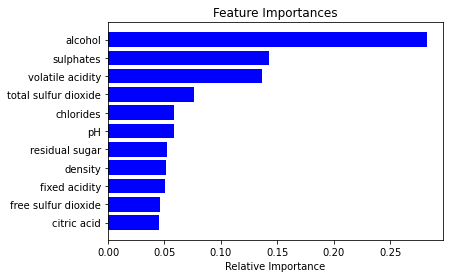

In [125]:
features = wd.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Removing the least important feautres according to the random forrest results

In [126]:
del x['fixed acidity']
del x['free sulfur dioxide']
del x['citric acid']

In [127]:
le = LabelEncoder()
y = le.fit_transform(df.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

<h4>Spliting data</h4>

The original data set is split such that 20% of the entire data is assigned as a test set and the rest remains as the training set. The train set is again split such that 20% of the train set is assigned as the validation set and the rest is used for the training purpose. Of the entire data set, 64% is treated as the training set, 16% as the validation set, and 20% as the test set.

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

<h4>Transforming quality to categorical data in training and test dataset</h4>

In [129]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

<h4>Scaling</h4>

In [153]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

<h2>DNN Classifier</h2>

In [154]:
ann = tf.keras.models.Sequential(layers = None , name = None)

In [155]:
ann.add(tf.keras.layers.Input(shape = 8,))

Since we removed the 3 unwanted features so the shape is going to be 8 

In [156]:
ann.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))

Hidden layer 1: 16 neurons, ReLU activation

In [157]:
ann.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))

Hidden layer 2: 8 neurons, ReLU activation

In [158]:
ann.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))

Output Layer: 6 neuron, Sigmoid activation

In [159]:
ann.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                144       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 6)                 54        
                                                                 
Total params: 334
Trainable params: 334
Non-trainable params: 0
_________________________________________________________________


In [160]:
ann.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])

We are using the adam optimizer and metrics as accuracy 

In [161]:
history = ann.fit(x_train, y_train_cat,  batch_size= 32, epochs = 150 , validation_data = (x_test,y_test_cat))

Epoch 1/150
40/40 [==============================] - 1s 11ms/step - loss: 1.7919 - accuracy: 0.2807 - val_loss: 1.6589 - val_accuracy: 0.4531
Epoch 2/150
40/40 [==============================] - 0s 7ms/step - loss: 1.6205 - accuracy: 0.4472 - val_loss: 1.5104 - val_accuracy: 0.4938
Epoch 3/150
40/40 [==============================] - 0s 6ms/step - loss: 1.4697 - accuracy: 0.4902 - val_loss: 1.3492 - val_accuracy: 0.5656
Epoch 4/150
40/40 [==============================] - 0s 4ms/step - loss: 1.3055 - accuracy: 0.5457 - val_loss: 1.1941 - val_accuracy: 0.5938
Epoch 5/150
40/40 [==============================] - 0s 4ms/step - loss: 1.1778 - accuracy: 0.5590 - val_loss: 1.1058 - val_accuracy: 0.6281
Epoch 6/150
40/40 [==============================] - 0s 3ms/step - loss: 1.1063 - accuracy: 0.5692 - val_loss: 1.0596 - val_accuracy: 0.6344
Epoch 7/150
40/40 [==============================] - 0s 3ms/step - loss: 1.0674 - accuracy: 0.5653 - val_loss: 1.0344 - val_accuracy: 0.6438
Epoch 8/150


Epoch 59/150
40/40 [==============================] - 0s 2ms/step - loss: 0.8871 - accuracy: 0.6145 - val_loss: 0.9296 - val_accuracy: 0.6219
Epoch 60/150
40/40 [==============================] - 0s 2ms/step - loss: 0.8846 - accuracy: 0.6153 - val_loss: 0.9310 - val_accuracy: 0.6187
Epoch 61/150
40/40 [==============================] - 0s 2ms/step - loss: 0.8840 - accuracy: 0.6122 - val_loss: 0.9287 - val_accuracy: 0.6187
Epoch 62/150
40/40 [==============================] - 0s 2ms/step - loss: 0.8834 - accuracy: 0.6153 - val_loss: 0.9285 - val_accuracy: 0.6219
Epoch 63/150
40/40 [==============================] - 0s 2ms/step - loss: 0.8828 - accuracy: 0.6099 - val_loss: 0.9255 - val_accuracy: 0.6250
Epoch 64/150
40/40 [==============================] - 0s 2ms/step - loss: 0.8807 - accuracy: 0.6185 - val_loss: 0.9242 - val_accuracy: 0.6281
Epoch 65/150
40/40 [==============================] - 0s 2ms/step - loss: 0.8804 - accuracy: 0.6138 - val_loss: 0.9254 - val_accuracy: 0.6281
Epoch 

40/40 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.6380 - val_loss: 0.9209 - val_accuracy: 0.6281
Epoch 117/150
40/40 [==============================] - 0s 2ms/step - loss: 0.8447 - accuracy: 0.6372 - val_loss: 0.9198 - val_accuracy: 0.6281
Epoch 118/150
40/40 [==============================] - 0s 2ms/step - loss: 0.8444 - accuracy: 0.6357 - val_loss: 0.9213 - val_accuracy: 0.6313
Epoch 119/150
40/40 [==============================] - 0s 2ms/step - loss: 0.8423 - accuracy: 0.6364 - val_loss: 0.9220 - val_accuracy: 0.6375
Epoch 120/150
40/40 [==============================] - 0s 2ms/step - loss: 0.8430 - accuracy: 0.6357 - val_loss: 0.9207 - val_accuracy: 0.6375
Epoch 121/150
40/40 [==============================] - 0s 2ms/step - loss: 0.8426 - accuracy: 0.6380 - val_loss: 0.9227 - val_accuracy: 0.6344
Epoch 122/150
40/40 [==============================] - 0s 2ms/step - loss: 0.8415 - accuracy: 0.6357 - val_loss: 0.9209 - val_accuracy: 0.6344
Epoch 123/150

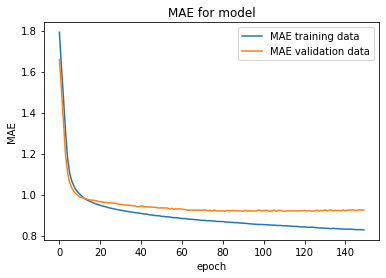

In [162]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

There is a gap between training data and validation data we can say that it is minimal overfitting. It can cause some genrazilation error

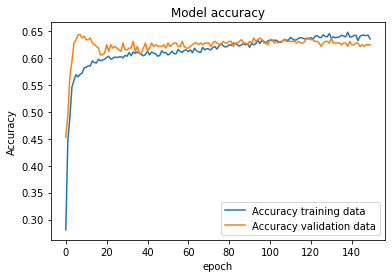

In [163]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

The model acccuracy model looks bit underfiting because the accuracy of the training data is high than the validation data 